### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import nn_verification, tr_mse, tr_mse_nn_output, load_generator
from models import g_unet, discriminator

Using TensorFlow backend.


In [25]:
models_path = 'trained_models/sand'
trend_num = 8
nn_name = 'nf64_eta5_3x3_rmsprop'
W = 256
H = 256
AA = 1
r = 1
l_0 = 1
l_1 = 15

In [26]:
f_gen = load_generator(models_path, trend_num, nn_name)

/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [27]:
K = (l_1 - l_0) / (W * AA)
def l0(x):
    return l_0

def l1(x):
    return l_1

def l_trend(x):
    return l_0 + K * x

In [28]:
nn_verification(models_path, trend_num, nn_name, f_gen, 25, W, H, l0, l1, l_trend, AA, r, True)

Verification: 100%|██████████| 25/25 [00:30<00:00,  1.18s/it]

NN output saved successfully.


In [29]:
verification_path = models_path + '/trend' + str(trend_num) + '/' + nn_name + '/verification'
nn_mse, nn_err, nn_tr, tr_side1, tr_side2, tr_pan  = tr_mse_nn_output(verification_path, r=1)

NN output: 100%|██████████| 25/25 [00:01<00:00, 22.96it/s]

Metrics saved successfully.


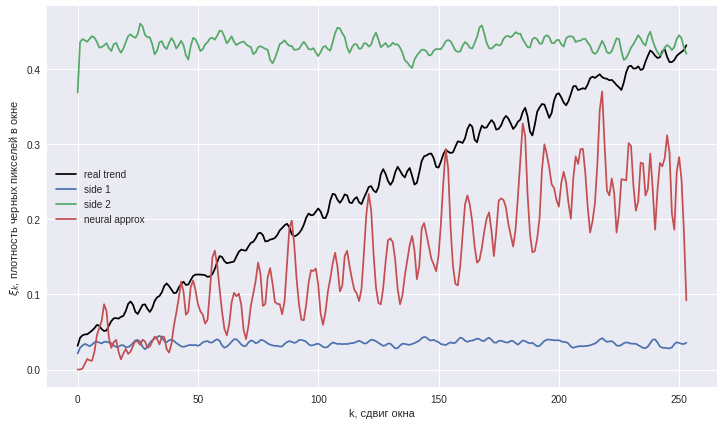

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(tr_pan, label='real trend', color='black')
plt.plot(tr_side1, label='side 1')
plt.plot(tr_side2, label='side 2')
plt.plot(nn_tr, label='neural approx')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig(verification_path + '/metrics' + '/tr_1.png')

In [31]:
np.save('../text/graphs/8-results/sand-trend8/tr_pan.npy', tr_pan)
np.save('../text/graphs/8-results/sand-trend8/tr_s1.npy', tr_side1)
np.save('../text/graphs/8-results/sand-trend8/tr_s2.npy', tr_side2)